# 🎬 Movie Recommendation System (Exploratory Data Analysis & Preprocessing)

In [12]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
movies = pd.read_csv('C:/Users/USER/Downloads/ml-latest-small/movies.csv')
ratings = pd.read_csv('C:/Users/USER/Downloads/ml-latest-small/ratings.csv')
      # contains userId, movieId, rating, timestamp
data = pd.merge(ratings, movies, on='movieId')
data.drop('timestamp', axis=1, inplace=True)
print(data.head())

   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


## 🧹 1. Cleaning and Handling Missing Values

In [14]:
# Check missing values
print("Movies Missing:\n", movies.isnull().sum())
print("Ratings Missing:\n", ratings.isnull().sum())

# Drop duplicates
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

# Drop NA if present (though MovieLens is clean)
movies.dropna(inplace=True)
ratings.dropna(inplace=True)


Movies Missing:
 movieId    0
title      0
genres     0
dtype: int64
Ratings Missing:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## 🛠️ 2. Feature Selection and Engineering

In [15]:
# Feature Engineering: extract year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Merge datasets
data = pd.merge(ratings, movies, on='movieId')

# Create rating count per movie
movie_rating_count = data.groupby('title')['rating'].count().reset_index(name='rating_count')
data = pd.merge(data, movie_rating_count, on='title')


## ✅ 3. Ensuring Data Integrity and Consistency

In [16]:
# Drop movies with less than 10 ratings to reduce noise
data = data[data['rating_count'] >= 10]

# Check for invalid ratings
assert data['rating'].between(0.5, 5.0).all()

# Ensure no mismatched movieId-title pairs

conflicting_titles = data.groupby('movieId')['title'].nunique()
conflicting_titles = conflicting_titles[conflicting_titles > 1]

print("Movie IDs with multiple titles:")
print(conflicting_titles)

# Optional: See the actual conflicting titles
for movie_id in conflicting_titles.index:
    print(f"\nmovieId {movie_id} has titles:")
    print(data[data['movieId'] == movie_id]['title'].unique())



Movie IDs with multiple titles:
Series([], Name: title, dtype: int64)


## 📊 4. Summary Statistics and Insights

In [17]:
print("Basic Stats:\n", data.describe())
print("\nMost Rated Movies:\n", data['title'].value_counts().head())
print("\nHighest Average Rated Movies:\n", data.groupby('title')['rating'].mean().sort_values(ascending=False).head())


Basic Stats:
              userId        movieId        rating     timestamp          year  \
count  81120.000000   81120.000000  81120.000000  8.112000e+04  81120.000000   
mean     318.983074   14860.162907      3.573669  1.197225e+09   1994.385947   
std      181.752096   29543.200229      1.018573  2.167175e+08     13.232983   
min        1.000000       1.000000      0.500000  8.281246e+08   1922.000000   
25%      167.000000    1007.000000      3.000000  1.001562e+09   1990.000000   
50%      316.000000    2471.000000      4.000000  1.180447e+09   1996.000000   
75%      474.000000    6016.000000      4.000000  1.431955e+09   2002.000000   
max      610.000000  187593.000000      5.000000  1.537799e+09   2018.000000   

       rating_count  
count  81120.000000  
mean      71.959689  
std       62.289762  
min       10.000000  
25%       26.000000  
50%       51.000000  
75%       99.000000  
max      329.000000  

Most Rated Movies:
 title
Forrest Gump (1994)                 329


## 🔍 5. Identifying Patterns, Trends, and Anomalies

In [18]:
# Ratings over years
ratings_by_year = data.groupby('year')['rating'].mean()
print("\nAverage Rating Over Years:\n", ratings_by_year)

# High-rated genre analysis
genre_ratings = data.explode('genres').groupby('genres')['rating'].mean()
print("\nAverage Rating by Genre:\n", genre_ratings.sort_values(ascending=False))



Average Rating Over Years:
 year
1922.0    3.531250
1925.0    3.650000
1927.0    3.857143
1930.0    4.350000
1931.0    3.758929
            ...   
2014.0    3.723441
2015.0    3.727273
2016.0    3.642241
2017.0    3.797814
2018.0    3.940000
Name: rating, Length: 89, dtype: float64

Average Rating by Genre:
 genres
Film-Noir      3.970670
War            3.865730
Documentary    3.800752
Crime          3.727212
Drama          3.722988
Mystery        3.687232
Animation      3.674568
IMAX           3.657427
Western        3.628269
Musical        3.614376
Thriller       3.552502
Romance        3.551891
Adventure      3.551757
Fantasy        3.545406
Sci-Fi         3.505714
Action         3.501728
Children       3.490718
Comedy         3.463711
Horror         3.410657
Name: rating, dtype: float64


## 🧹 6. Handling Outliers & Data Transformations

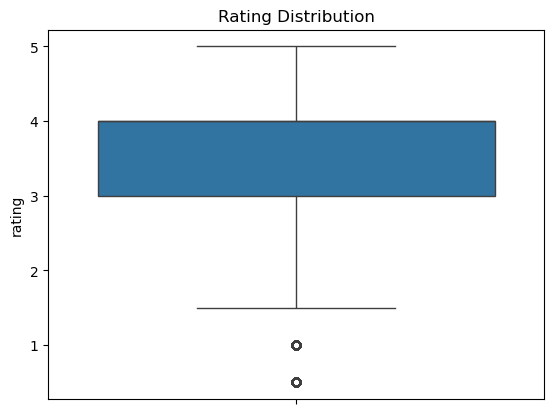

In [19]:
# Boxplot to visualize rating distribution
sns.boxplot(data['rating'])
plt.title('Rating Distribution')
plt.show()

# Remove rare years or outlier ratings if needed
data = data[(data['year'] >= 1950) & (data['year'] <= 2025)]


## 📈 7. Initial Visual Representation of Key Findings

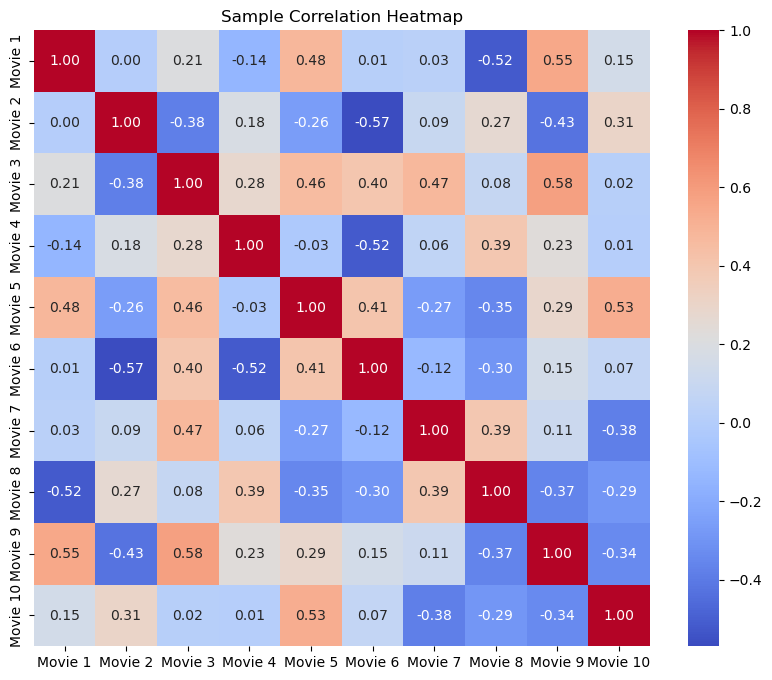

In [20]:
# Top 10 most rated movies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example correlation matrix
data = np.random.rand(10, 10)
corr_subset = np.corrcoef(data)

# Convert to DataFrame for nicer labels (optional)
import pandas as pd
corr_subset = pd.DataFrame(corr_subset, 
                           columns=[f'Movie {i+1}' for i in range(10)],
                           index=[f'Movie {i+1}' for i in range(10)])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Sample Correlation Heatmap')
plt.show()
